In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("/kaggle/input/top1000youtubers/youtubers_df.csv")

In [7]:
df.head(10)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,253500000.0,India,111300.0,3200.0,120.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",210100000.0,Estados Unidos,95400000.0,5400000.0,16600.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,168100000.0,Unknown,4100000.0,21600.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,165400000.0,India,23300.0,239.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",116500000.0,Unknown,4100000.0,8800.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,658,PewDiePie,"Películas, Videojuegos",111400000.0,Estados Unidos,2900000.0,182000.0,8100.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,110400000.0,Unknown,4100000.0,14500.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",105500000.0,Unknown,5500000.0,17300.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,102600000.0,India,46700.0,1800.0,34.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,98100000.0,Estados Unidos,148200.0,4600.0,189.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


In [8]:
df.shape

(1000, 9)

In [9]:
df.dtypes

Rank           object
Username       object
Categories     object
Suscribers    float64
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object

In [10]:
df.isnull().sum()

Rank            0
Username        0
Categories    324
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   object 
 1   Username    1000 non-null   object 
 2   Categories  676 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


In [12]:
df.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [13]:
df.rename(columns={"Suscribers":"Subscribers"},inplace=True)

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(676, 9)

In [16]:
df.describe(include='all')

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
count,676,676,676,6.760000e+02,676,6.760000e+02,6.760000e+02,676.000000,676
unique,676,675,47,NaN,26,NaN,NaN,NaN,675
top,1,dropout,Música y baile,NaN,Estados Unidos,NaN,NaN,NaN,http://youtube.com/channel/UCPDXXXJj9nax0fr0Wf...
freq,1,2,152,NaN,226,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,2.327604e+07,NaN,1.042457e+06,4.851987e+04,2486.606509,NaN
std,NaN,NaN,NaN,1.905725e+07,NaN,4.218572e+06,2.451933e+05,24883.678192,NaN
min,NaN,NaN,NaN,1.230000e+07,NaN,0.000000e+00,0.000000e+00,0.000000,NaN
25%,NaN,NaN,NaN,1.450000e+07,NaN,3.522500e+04,5.822500e+02,3.750000,NaN
50%,NaN,NaN,NaN,1.750000e+07,NaN,1.785000e+05,3.300000e+03,105.000000,NaN
75%,NaN,NaN,NaN,2.480000e+07,NaN,7.876250e+05,2.217500e+04,505.250000,NaN


In [17]:
df.drop(columns="Links",inplace=True)

In [18]:
df["Categories"].fillna("Unknown",inplace=True)

In [19]:
df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments
0,1,tseries,Música y baile,253500000.0,India,111300.0,3200.0,120.0
1,2,MrBeast,"Videojuegos, Humor",210100000.0,Estados Unidos,95400000.0,5400000.0,16600.0
2,3,CoComelon,Educación,168100000.0,Unknown,4100000.0,21600.0,0.0
4,5,KidsDianaShow,"Animación, Juguetes",116500000.0,Unknown,4100000.0,8800.0,0.0
5,658,PewDiePie,"Películas, Videojuegos",111400000.0,Estados Unidos,2900000.0,182000.0,8100.0


In [20]:
df.drop_duplicates(subset=["Username"],inplace=True)

In [21]:
df.Categories.unique()

array(['Música y baile', 'Videojuegos, Humor', 'Educación',
       'Animación, Juguetes', 'Películas, Videojuegos', 'Juguetes',
       'Videojuegos', 'Películas, Animación', 'Películas',
       'Noticias y Política', 'Animación, Humor', 'Películas, Humor',
       'Películas, Juguetes', 'Música y baile, Películas',
       'Música y baile, Animación', 'Vlogs diarios',
       'Videojuegos, Juguetes', 'Animación, Videojuegos',
       'Música y baile, Humor', 'Animación', 'Ciencia y tecnología',
       'Fitness, Salud y autoayuda', 'Belleza, Moda', 'Humor',
       'Diseño/arte', 'Comida y bebida', 'Viajes, Espectáculos',
       'Deportes', 'Fitness', 'Comida y bebida, Salud y autoayuda',
       'Salud y autoayuda', 'DIY y Life Hacks, Juguetes',
       'AnimaciónHumorEducación', 'Educación, Juguetes',
       'Música y baile, Juguetes', 'Juguetes, Coches y vehículos',
       'Animales y mascotas', 'Belleza', 'ASMR', 'Moda',
       'DIY y Life Hacks', 'Diseño/arte, Belleza', 'Coches y vehículo

In [22]:
df.Country.unique()

array(['India', 'Estados Unidos', 'Unknown', 'Brasil', 'México', 'Rusia',
       'Pakistán', 'Indonesia', 'Francia', 'Colombia', 'Iraq',
       'Argentina', 'Filipinas', 'Turquía', 'Tailandia', 'Arabia Saudita',
       'Bangladesh', 'Reino Unido', 'España', 'República de Corea',
       'Egipto', 'Marruecos', 'Jordania', 'Singapur', 'Perú', 'Argelia'],
      dtype=object)

In [23]:
categories = df.Categories.unique()

In [24]:
country = df.Country.unique()

In [25]:
!pip install googletrans==4.0.0rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.3 MB/s eta 0:00:00
  Obtaining dependency information for hstspreload from https://files.pythonhosted.org/packages/74/37/6fb177217abf90ac8ba7997919dc5075894ff39b11f83ea9ae86cf932fff/hstspreload-2024.1.5-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=21e1b19420cb20f340b2a9103ca943e102a74c2c7f1f5b285697499b2ee0b0c3
  Stored in directory: /root

In [26]:
from googletrans import Translator
translator = Translator()

def translate_col(text):
    return translator.translate(text,src="es", dest="en").text

cat_map = {x:translate_col(x) for x in categories}

In [27]:
def convert_to_translated(text):
    return cat_map[text]

df.Categories = df.Categories.apply(convert_to_translated)

In [28]:
from googletrans import Translator

translator = Translator()

def translate_country(text):
    return translator.translate(text, src="auto", dest="en").text

country_map = {x: translate_country(x) for x in country}

def convert_to_translated_country(text):
    return country_map[text]

df.Country = df.Country.apply(convert_to_translated_country)

In [29]:
df.Categories.unique()

array(['Music and dance', 'Video games, humor', 'Education',
       'Animation, toys', 'Movies, video games', 'Toys', 'Video game',
       'Movies, animation', 'Films', 'News and politics',
       'Animation, humor', 'Movies, humor', 'Movies, toys',
       'Music and dance, movies', 'Music and dance, animation',
       'Vlogs daily', 'Video games, toys', 'Animation, video games',
       'Music and dance, humor', 'Animation', 'Science and Technology',
       'Fitness, Health and Selfayuda', 'Beauty, fashion', 'Humor',
       'Art design', 'Food and drink', 'Trips, shows', 'Sports',
       'Fitness', 'Food and drink, health and self -help',
       'Health and self -help', 'DIY AND LIFE HACKS, TOYS',
       'Humoreducation animation', 'Education, toys',
       'Music and dance, toys', 'Toys, cars and vehicles',
       'Animals and pets', 'Beauty', 'ASMR', 'Fashion',
       'DIY AND LIFE HACKS', 'Design/Art, beauty', 'Cars and vehicles',
       'Animation, humor, toys', 'Mystery', 'ASMR, f

In [30]:
df.Country.unique()

array(['India', 'USA', 'Unknown', 'Brazil', 'Mexico', 'Russian',
       'Pakistan', 'Indonesia', 'France', 'Colombia', 'Iraq', 'Argentina',
       'Filipinas', 'Türkiye', 'Thailand', 'Saudi Arabia', 'Bangladesh',
       'United Kingdom', 'Space', 'Republic of Korea', 'Egypt', 'Morocco',
       'Jordan', 'Singapore', 'Peru', 'Algeria'], dtype=object)

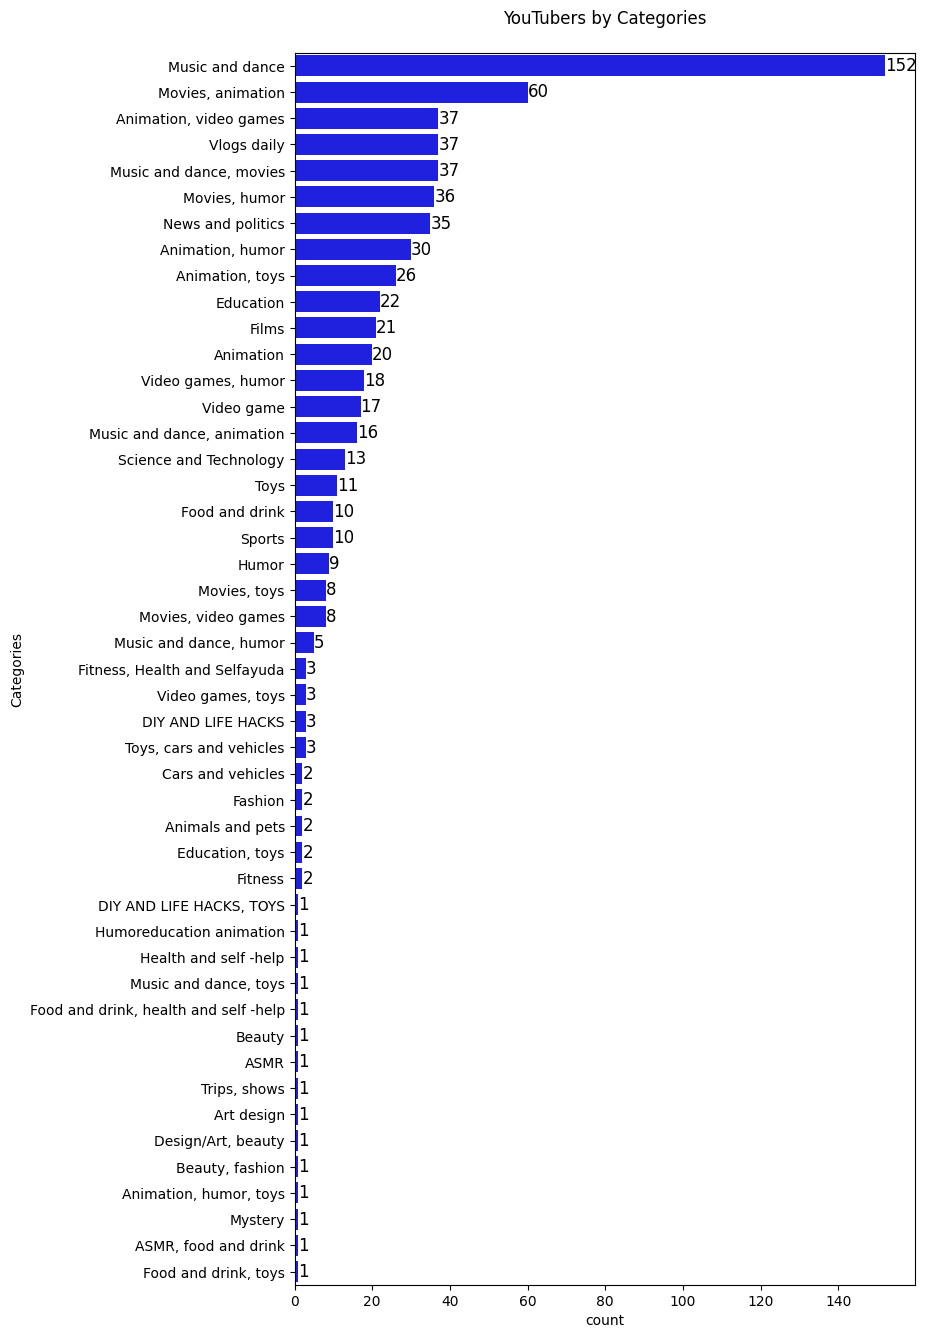

In [31]:
plt.figure(figsize=(8, 16))
ax = sns.countplot(data=df, y='Categories', color='#0000FF', order=df['Categories'].value_counts().index)
plt.title('YouTubers by Categories\n')

for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height()/2., 
            int(p.get_width()), 
            fontsize=12, color='black', ha='left', va='center')

plt.show()

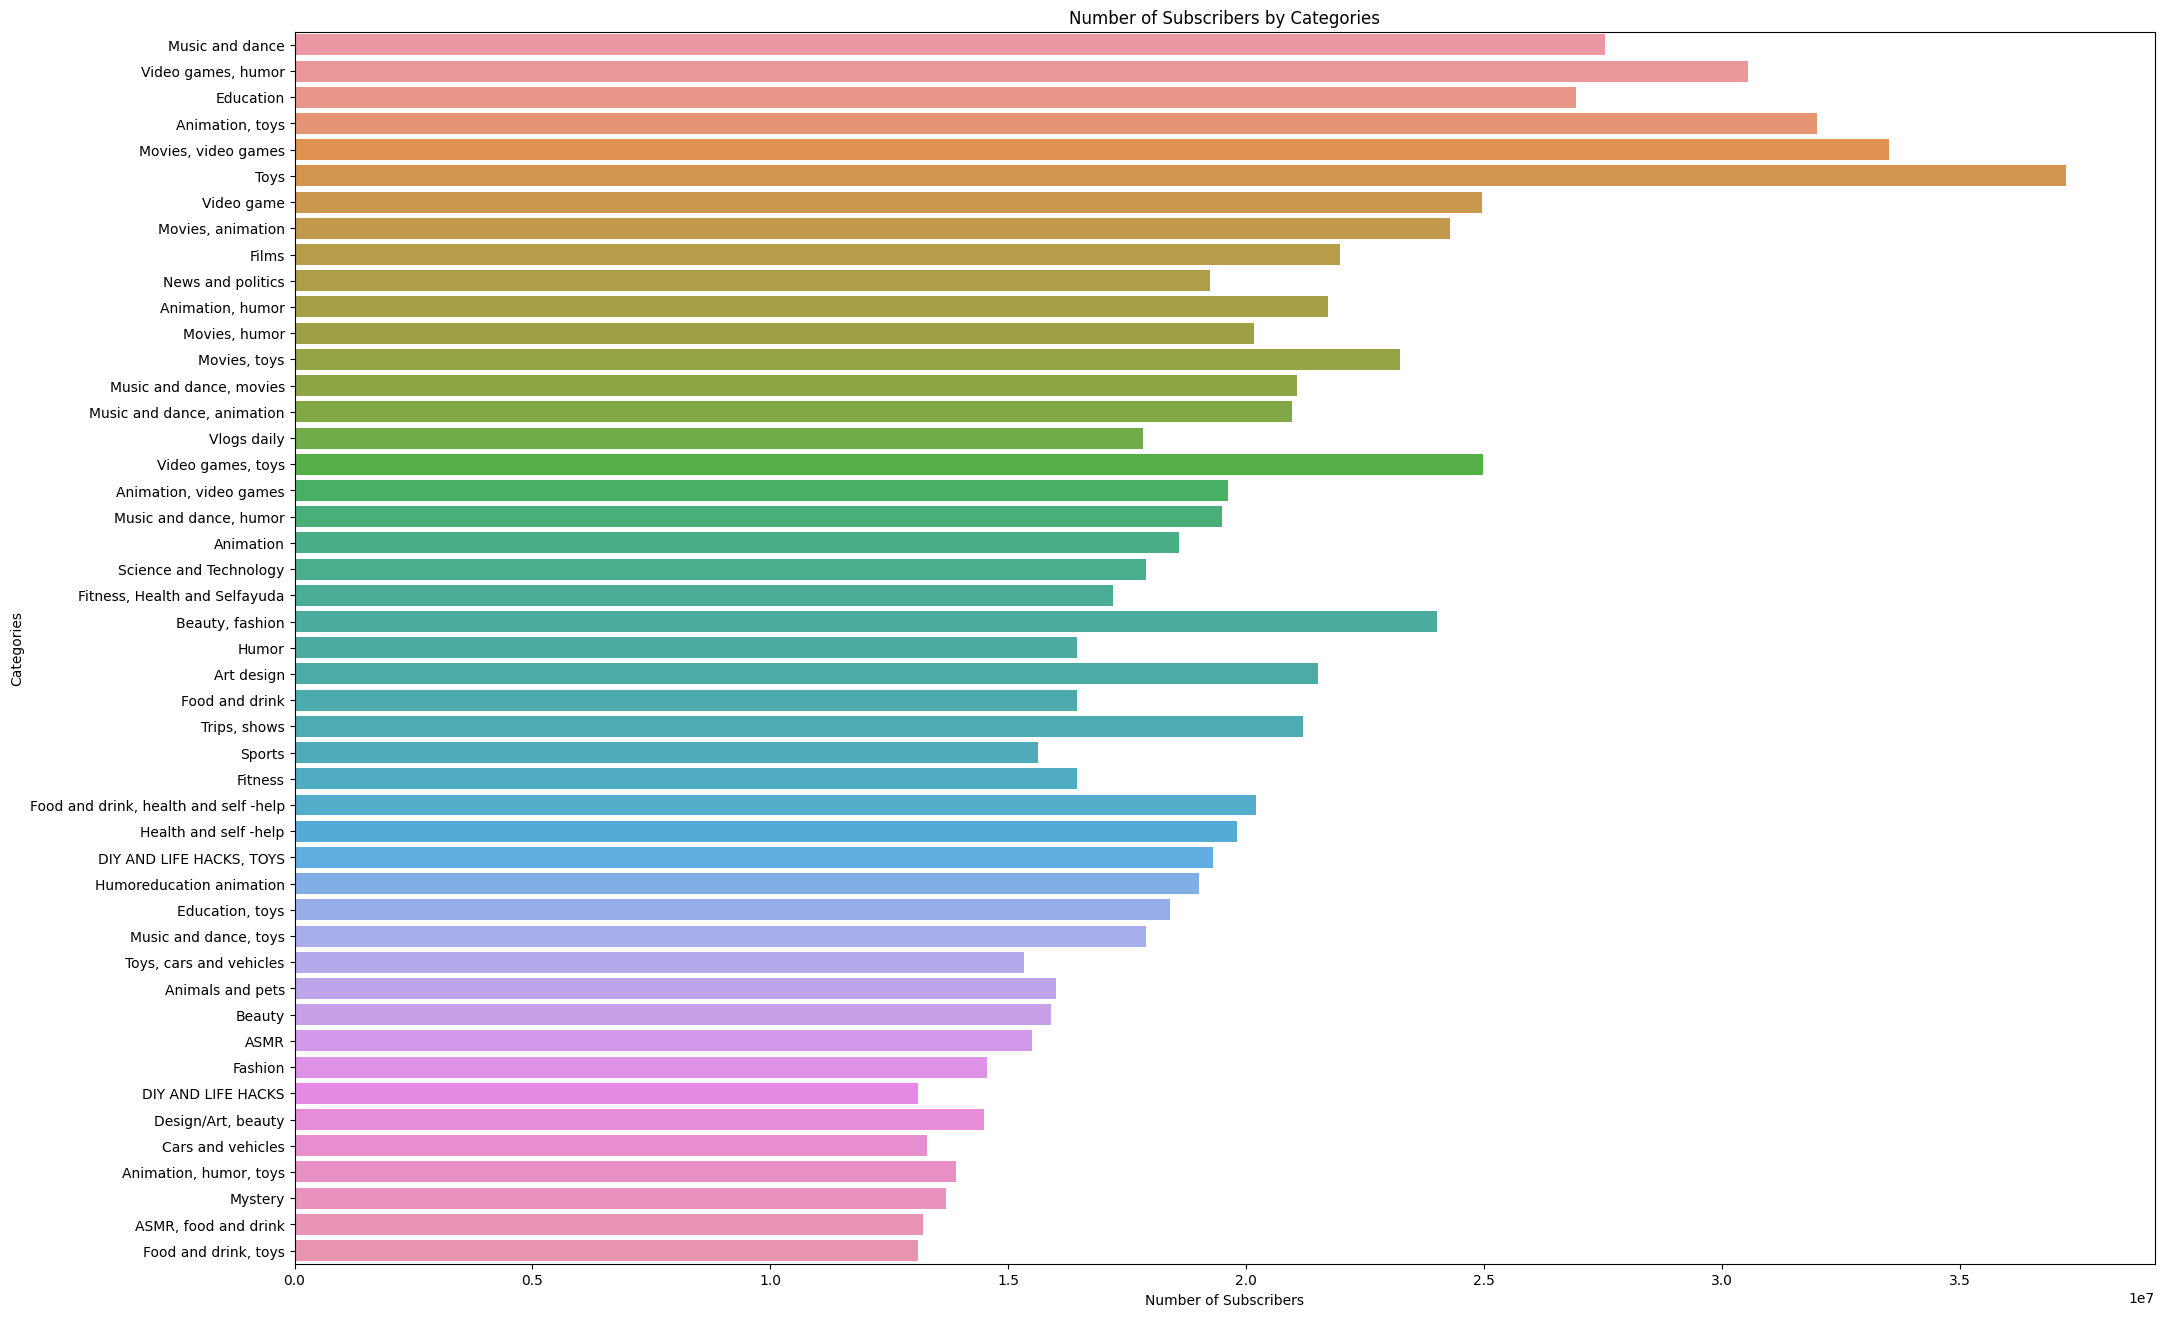

In [32]:
plt.figure(figsize=(24, 16))
sns.barplot(data=df, x='Subscribers', y='Categories', ci=None)
plt.title('Number of Subscribers by Categories')
plt.xlabel('Number of Subscribers')
plt.ylabel('Categories')
plt.show()

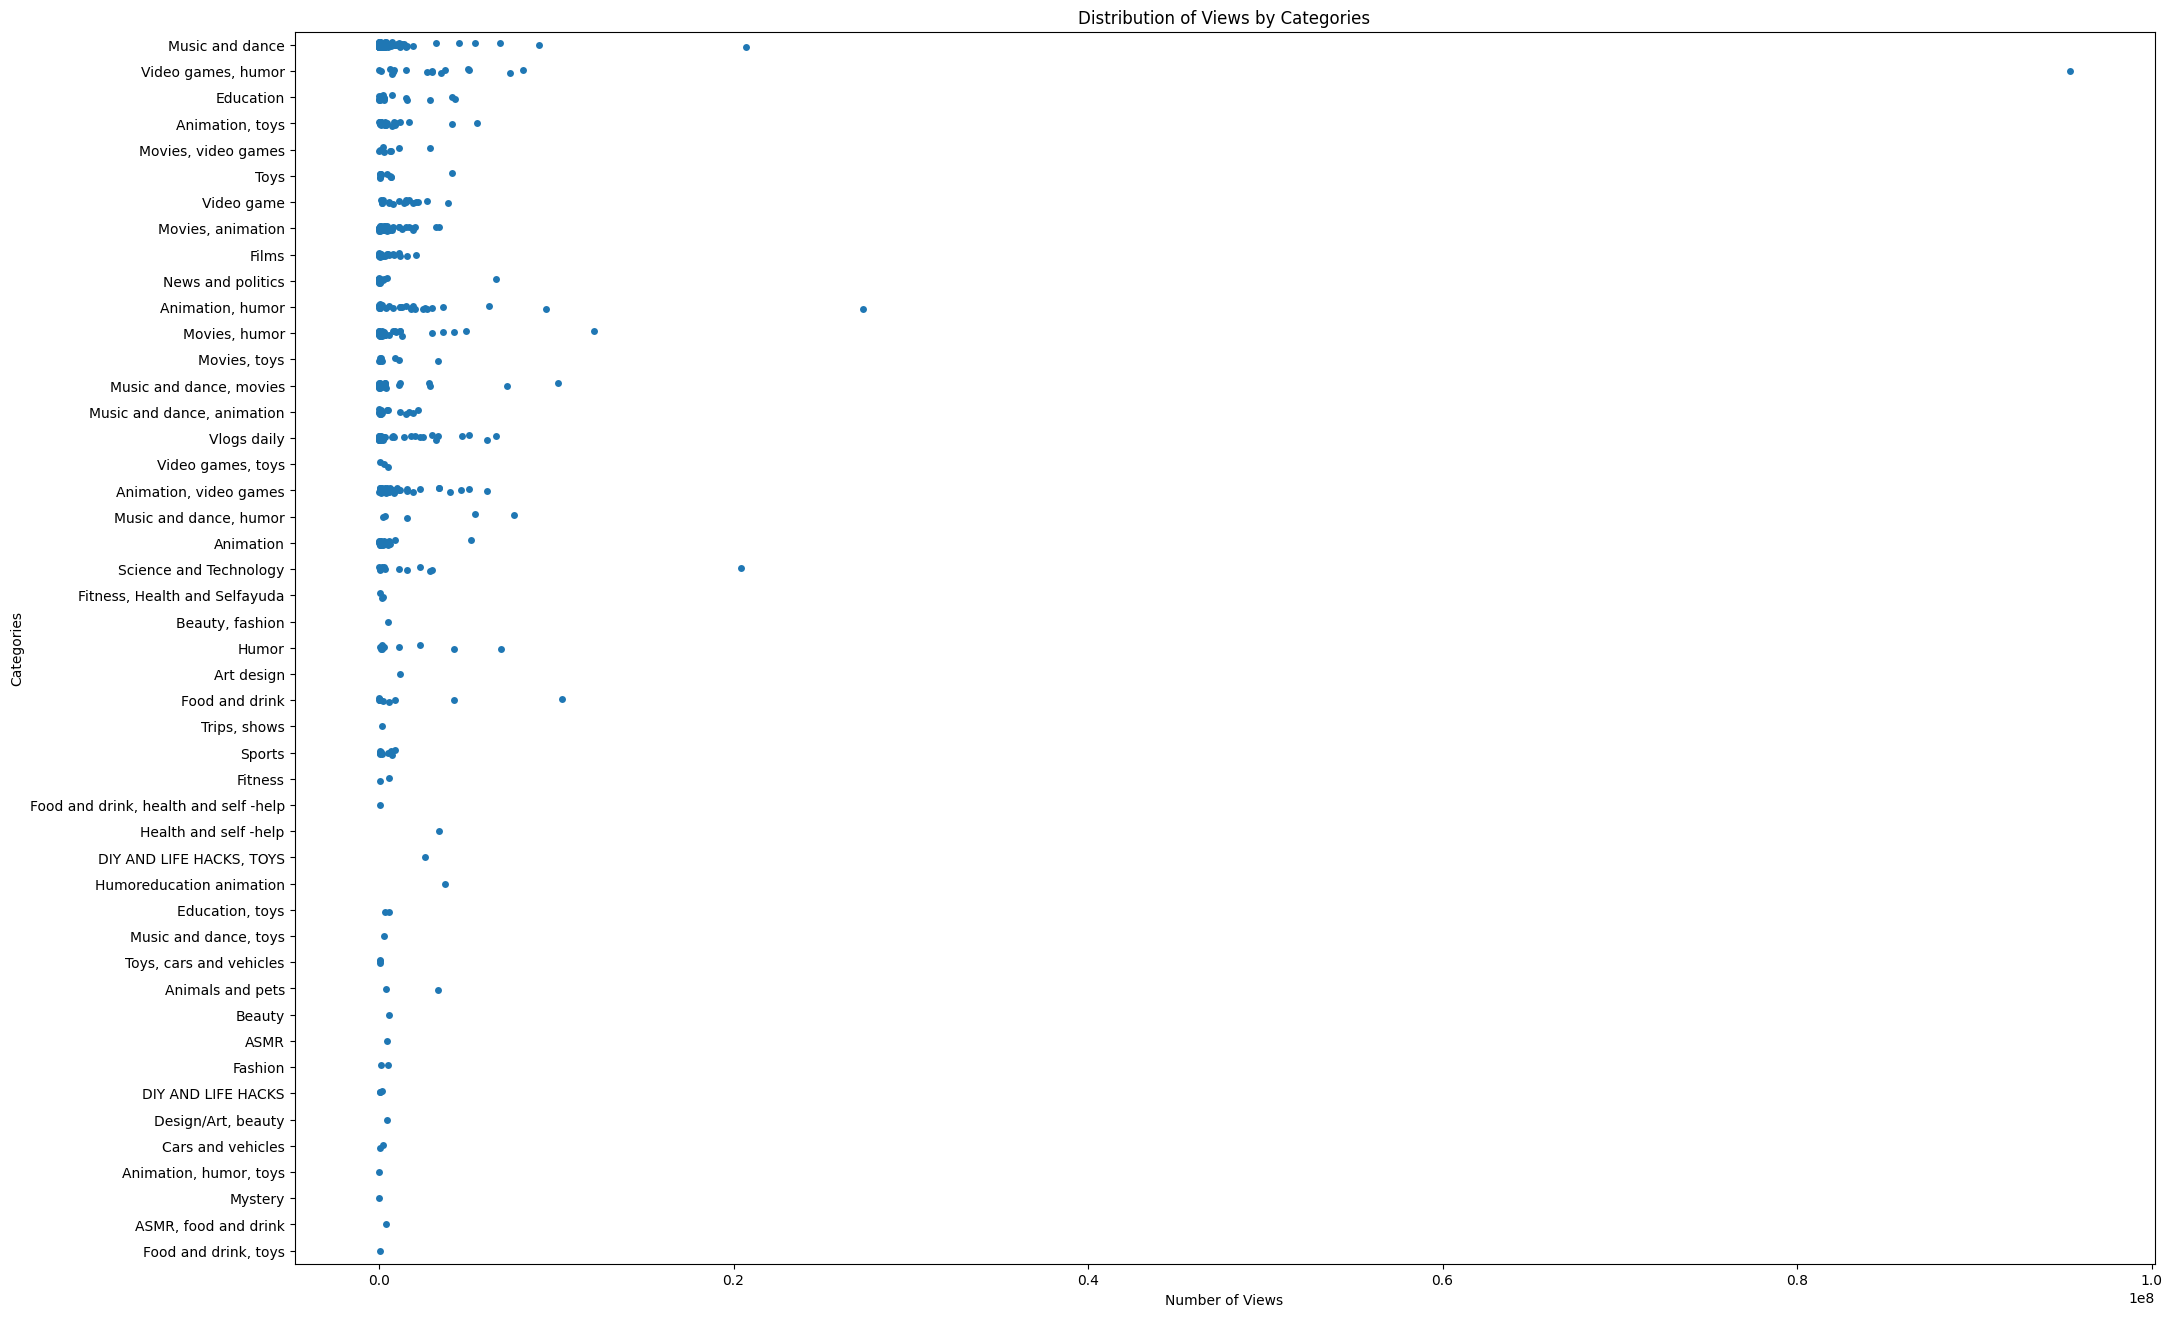

In [33]:
plt.figure(figsize=(24, 16))
sns.stripplot(data=df, x='Visits', y='Categories', jitter=True)
plt.title('Distribution of Views by Categories')
plt.xlabel('Number of Views')
plt.ylabel('Categories')
plt.show()

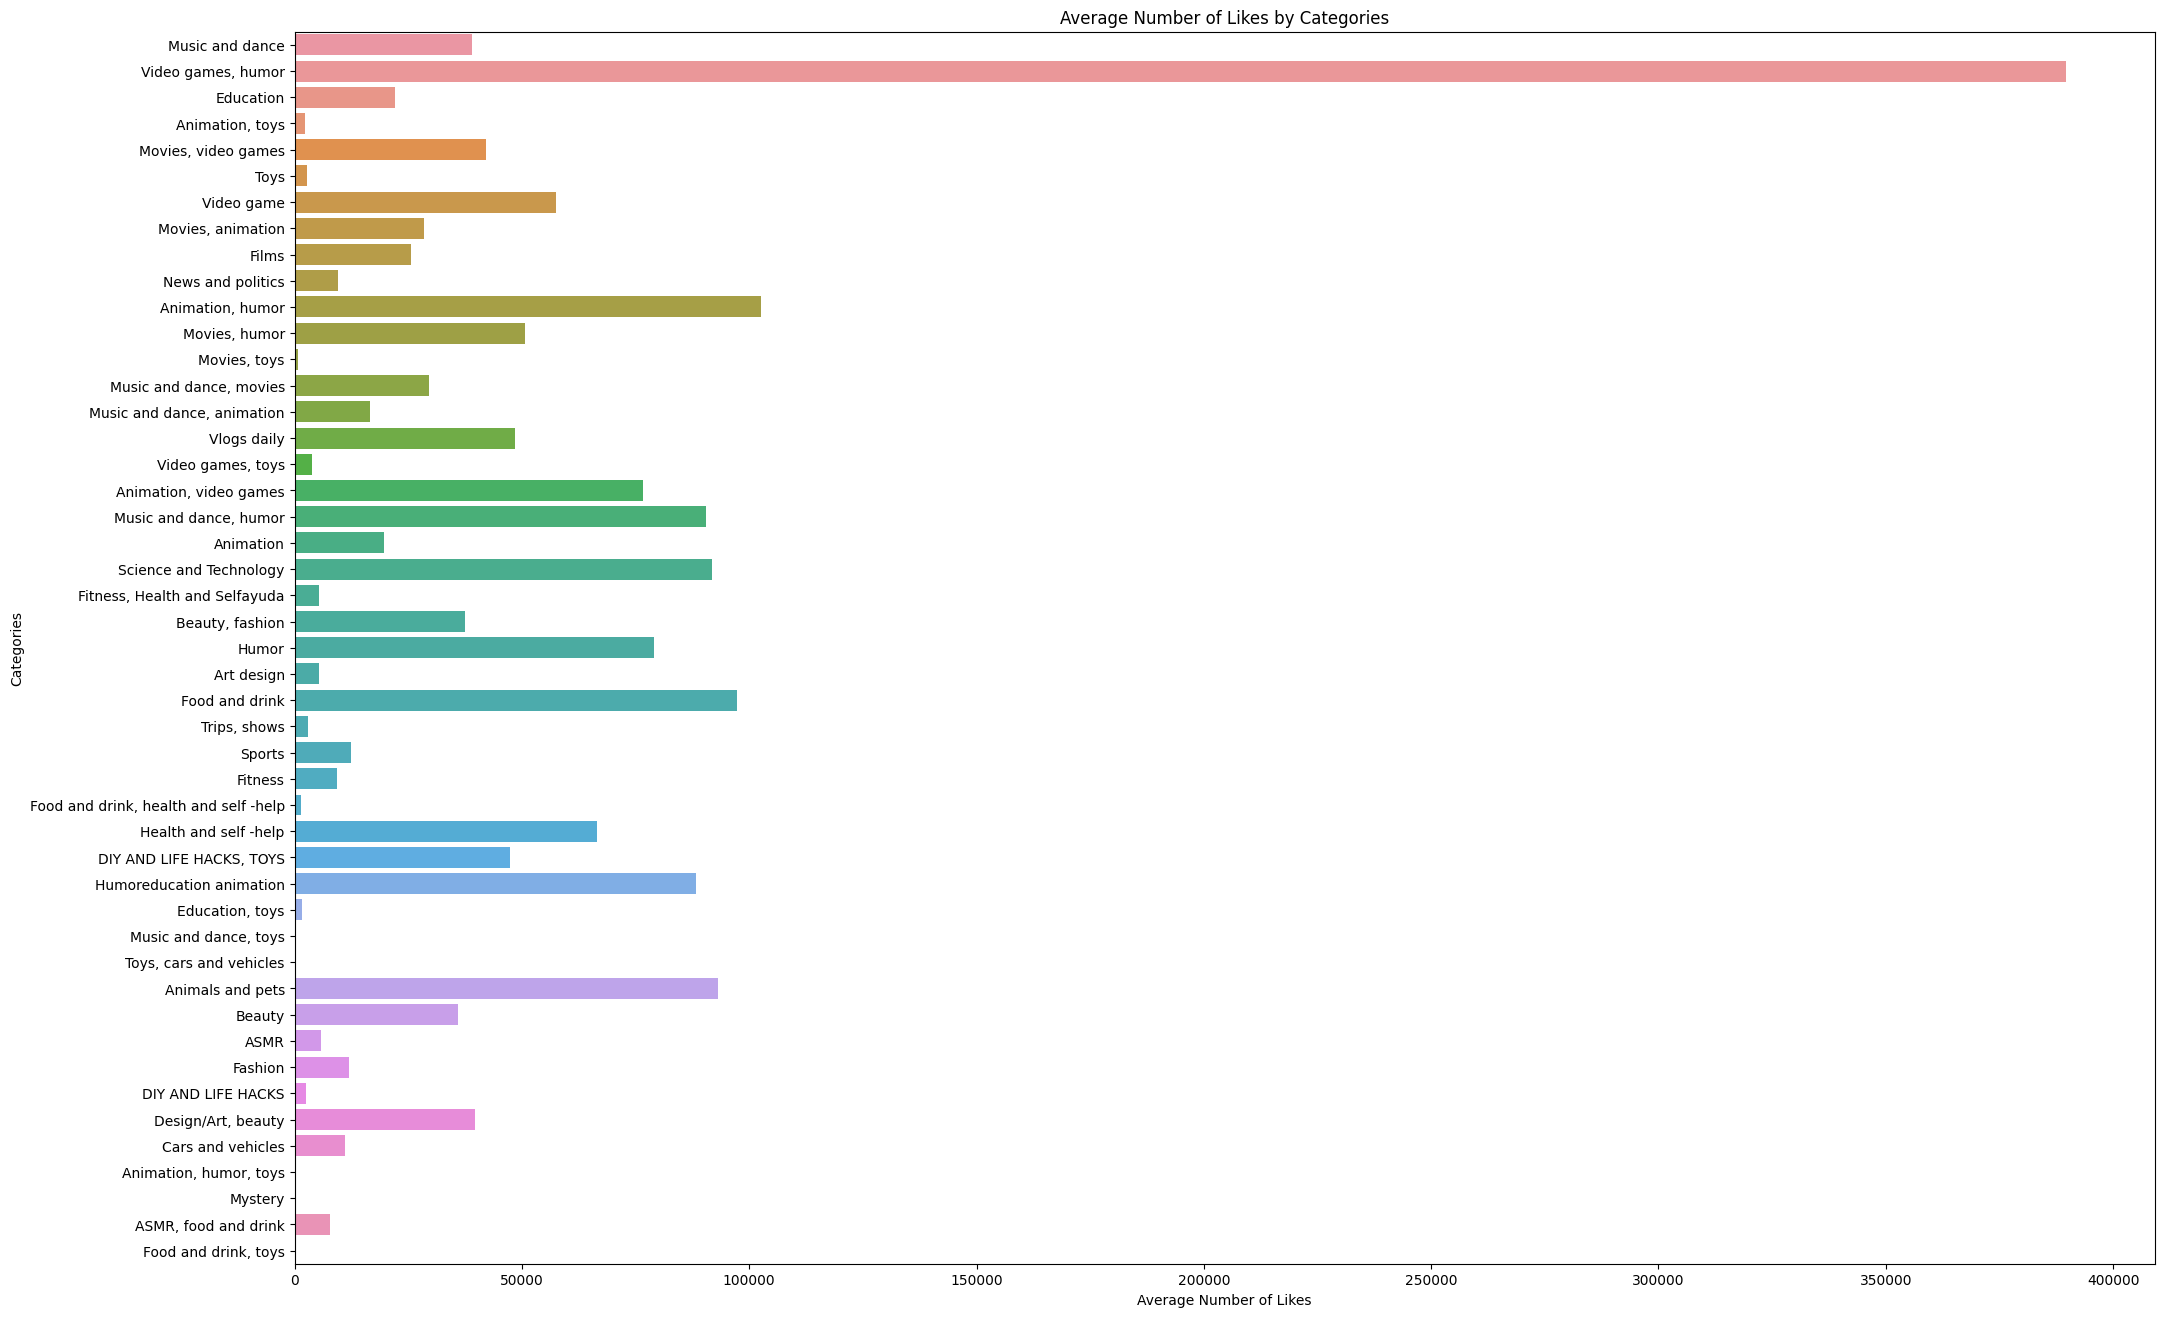

In [34]:
plt.figure(figsize=(24, 16))
sns.barplot(data=df, x='Likes', y='Categories', ci=None)
plt.title('Average Number of Likes by Categories')
plt.xlabel('Average Number of Likes')
plt.ylabel('Categories')
plt.show()

In [35]:
import plotly.express as px

top_categories = df['Categories'].value_counts().nlargest(20).reset_index()
top_categories.columns = ['Category', 'Count']

fig = px.pie(top_categories, names='Category', values='Count', title='Video Distribution by Top 20 Categories')

fig.update_layout(height=600, width=800)

fig.show()

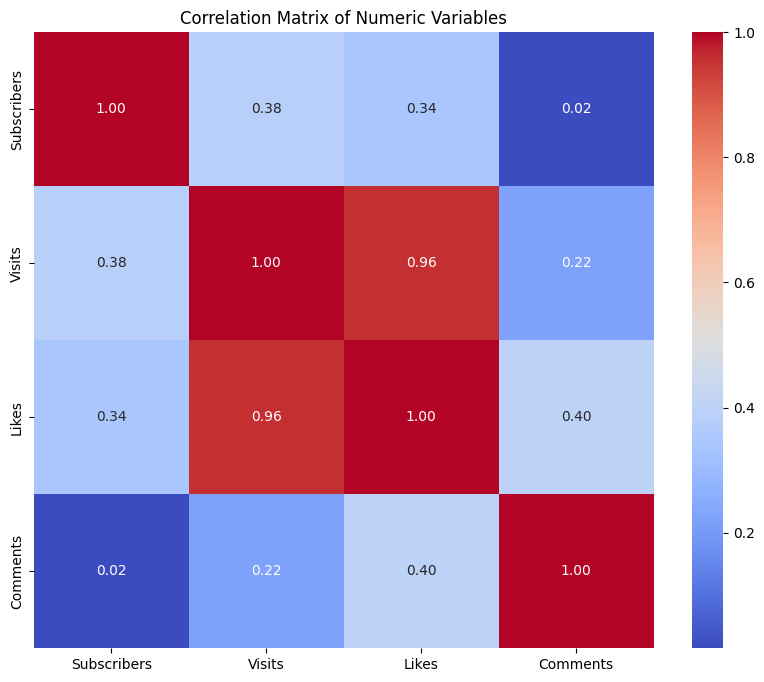

In [36]:
correlation_matrix = df[['Subscribers', 'Visits', 'Likes', 'Comments']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

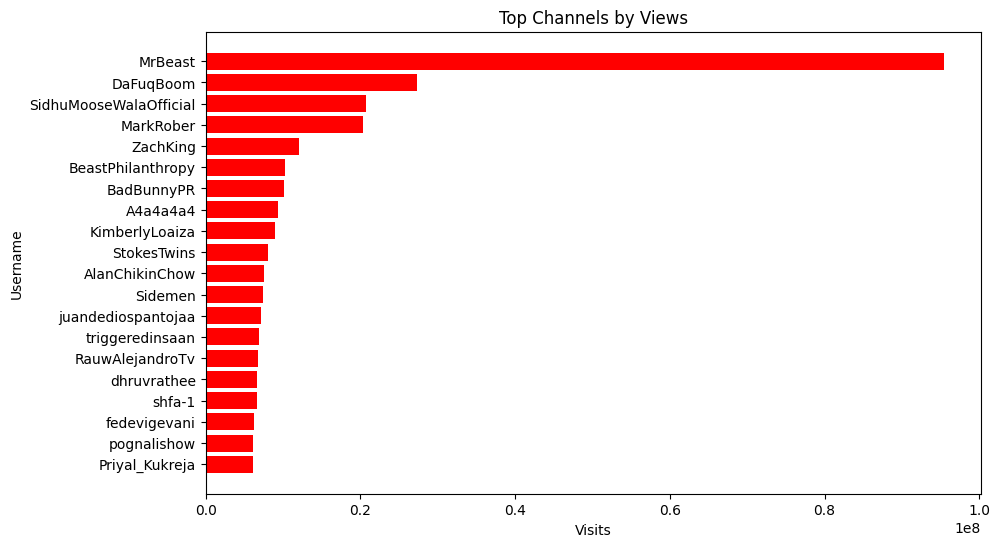

In [37]:
DF_sorted_by_views = df.sort_values(by='Visits', ascending=False)

top_channels_by_views = DF_sorted_by_views.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_channels_by_views['Username'], top_channels_by_views['Visits'], color='#FF0000')
plt.xlabel('Visits')
plt.ylabel('Username')
plt.title('Top Channels by Views')
plt.gca().invert_yaxis()  
plt.show()

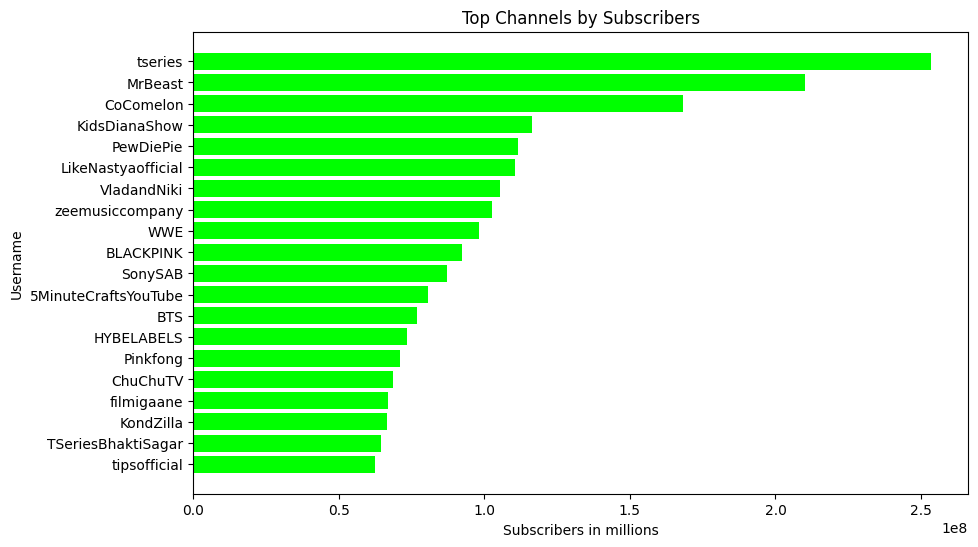

In [38]:
DF_sorted_by_subscribers = df.sort_values(by='Subscribers', ascending=False)
top_channels_by_subscribers = DF_sorted_by_subscribers.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_channels_by_subscribers['Username'], top_channels_by_subscribers['Subscribers'], color='#00FF00')
plt.xlabel('Subscribers in millions')
plt.ylabel('Username')
plt.title('Top Channels by Subscribers')
plt.gca().invert_yaxis()  
plt.show()

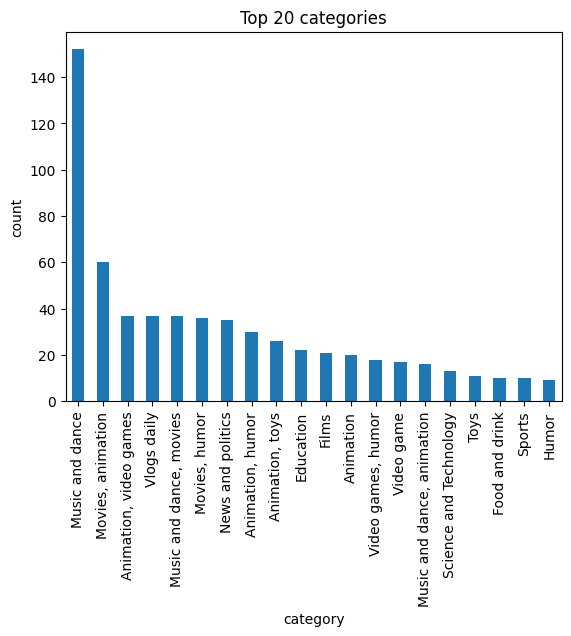

In [39]:
categories = df["Categories"].value_counts().head(20)
categories.plot(kind = "bar")
plt.xlabel("category")
plt.ylabel("count")
plt.title("Top 20 categories")
plt.show()

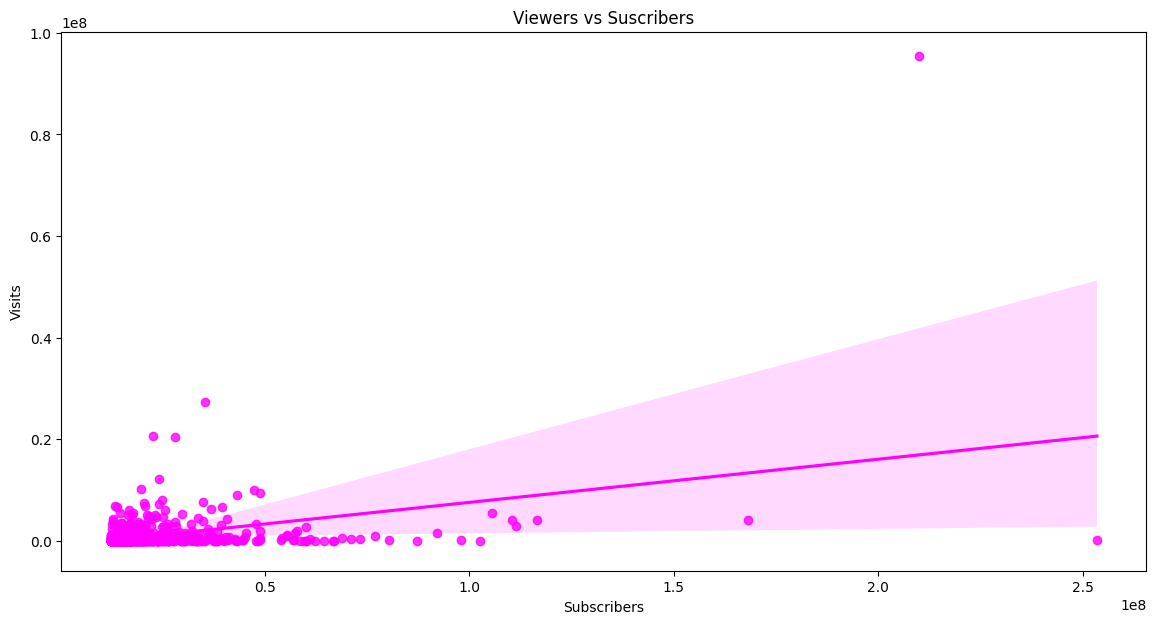

In [40]:
plt.figure(figsize=(14,7))
sns.regplot(data=df, x='Subscribers', y='Visits', color='#FF00FF')
plt.title('Viewers vs Suscribers')
plt.show()

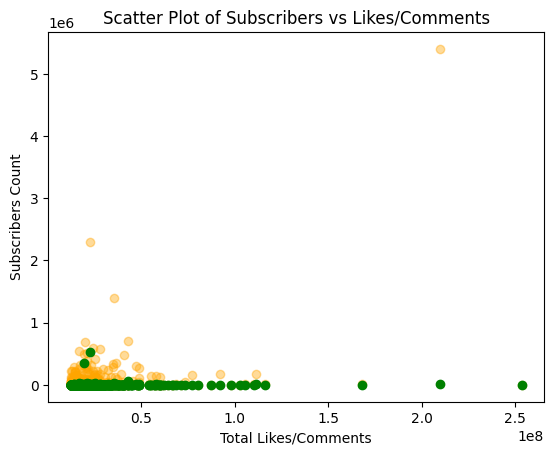

In [41]:
plt.scatter(df['Subscribers'], df['Likes'], alpha = .4, label = 'Likes', color = 'orange')
plt.scatter(df['Subscribers'], df['Comments'], alpha = 1, label = 'Comments', color = 'green')
plt.xlabel('Total Likes/Comments')
plt.ylabel('Subscribers Count')
plt.title('Scatter Plot of Subscribers vs Likes/Comments')
plt.show()

In [42]:
df2 = df[df["Country"] == "India"]

In [43]:
top_20_youtubers = df2.sort_values(by='Subscribers', ascending=False).head(20)

fig = px.bar(top_20_youtubers, x="Username", y="Subscribers", color="Username",
             title="Analysis of Top 20 YouTubers with highest no: of Subscribers in India")

fig.show()

In [44]:
coun = df[["Country", "Categories", "Subscribers", "Username"]]

fig = px.sunburst(coun, path=['Country','Categories', 'Username'], values='Subscribers',
                  title= 'YouTubers on the basis of their Country, Categories and Username', height=1000)
fig.show()

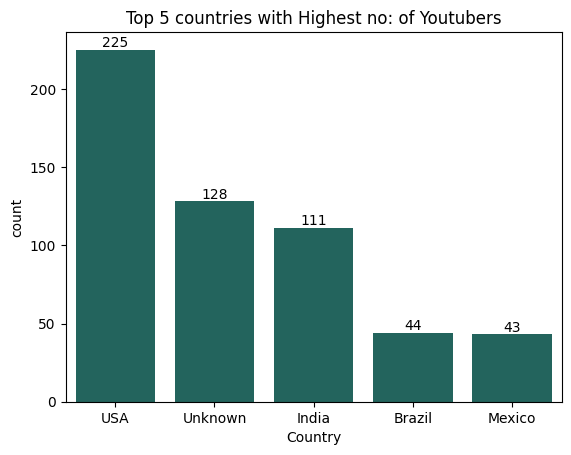

In [45]:
top_countries = df['Country'].value_counts().nlargest(5).index

ax = sns.countplot(x='Country', data=df, order=top_countries, color='#186F65')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title("Top 5 countries with Highest no: of Youtubers")
plt.show()

In [55]:
user_item_matrix = df.pivot_table(index='Username', columns='Categories', values='Subscribers', fill_value=0)

In [56]:
user_item_matrix

Categories,ASMR,"ASMR, food and drink",Animals and pets,Animation,"Animation, humor","Animation, humor, toys","Animation, toys","Animation, video games",Art design,Beauty,...,News and politics,Science and Technology,Sports,Toys,"Toys, cars and vehicles","Trips, shows",Video game,"Video games, humor","Video games, toys",Vlogs daily
Username,,,,,,,,,,,,,,,,,,,,,
123GOSpanish,0.0,0.0,0.0,13900000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123GO_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1theK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50Cent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5MCArabic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yudistardhana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zappytoons,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zeemusiccompany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
cosine_sim = cosine_similarity(user_item_matrix)

In [62]:
def get_recommendations(Username, cosine_sim=cosine_sim):
    idx = user_item_matrix.index.get_loc(Username)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    streamer_indices = [i[0] for i in sim_scores]
    return user_item_matrix.index[streamer_indices]

In [65]:
recommended_streamers = get_recommendations('WWE')

In [66]:
print(recommended_streamers)

Index(['Compot', 'Cookieswirlc', 'EdisonPts', 'GLENTYOUTUBE', 'HiBestMan',
       'Miawaug', 'MrMaxLife', 'NinjaKidz', 'SlivkiShow', 'WWE', 'colinfurze',
       'dudeperfect', 'howridiculous', 'kuplinovplay', 'lunomosik',
       'theHacksmith', '123GOSpanish', '123GO_', '1theK', '50Cent'],
      dtype='object', name='Username')
